# Oversampling

In [53]:
import imblearn
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,classification_report,plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Loading and Preprocessing

In [54]:
df = pd.read_csv("bank-additional-full.csv", delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [55]:
cols = df.columns
var_numerical = list(df._get_numeric_data().columns)
var_categorical = list(set(cols) - set(var_numerical) - set('y'))

In [56]:
# Default variable and Day of week has no impact on the client subscribing for term deposit.
df.drop(["default"], axis = 1, inplace=True)
df.drop(["day_of_week"], axis = 1, inplace=True)


In [57]:
df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)
var_numerical = list(set(var_numerical) - set(['emp.var.rate', 'nr.employed']))

In [58]:
# Get the dummy variables for contact, poutcome , job, month, marital,  education
# Let's drop the first column from  using 'drop_first = True' as first column can be derived using other columns 

df['job'] = df['job'].apply(lambda x: -1 if x=='unknown' or x=='unemployed' else (15 if x=='entrepreneur' else (8 if x == 'blue-collar' else ( 6 if x=='technician' or x=='services' or  x=='admin.' or x=='management' else (4 if x== 'self-employed' or x=='student' else (2 if x=='housemaid' or x=='retired' else None) )))))
df['housing'] = df['housing'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['loan'] = df['loan'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['y'] = df['y'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['poutcome'] = df['poutcome'].apply(lambda x: 0 if x=='failure' else (2 if x=='failure' else - 1))
df['pdays'] = df['pdays'].apply(lambda x: 0 if x==999 else(20 if x<=10 else(6 if x<=20 else 3)))

df  = pd.get_dummies(df, drop_first = True)

In [59]:
y = df.pop('y')

In [60]:
df.head()

,age,job,housing,loan,duration,campaign,pdays,previous,poutcome,cons.price.idx,...,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,2,0,0,261,1,0,0,-1,93.994,...,1,0,0,0,0,0,1,0,0,0
1,57,6,0,0,149,1,0,0,-1,93.994,...,1,0,0,0,0,0,1,0,0,0
2,37,6,1,0,226,1,0,0,-1,93.994,...,1,0,0,0,0,0,1,0,0,0
3,40,6,0,0,151,1,0,0,-1,93.994,...,1,0,0,0,0,0,1,0,0,0
4,56,6,0,1,307,1,0,0,-1,93.994,...,1,0,0,0,0,0,1,0,0,0


In [61]:
counter = Counter(y)
print(counter)

Counter({0: 36548, 1: 4640})


## SMOTE


In [62]:
oversample = SMOTE()
X_s, y_s = oversample.fit_resample(df, y)

In [63]:
cnt_1 = Counter(y_s)
print(cnt_1)

Counter({0: 36548, 1: 36548})


In [64]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size = 0.2, random_state = 100)

In [65]:
dtclf = DecisionTreeClassifier( max_depth=8, criterion='gini',class_weight= {0:1,1:1})
dtclf= dtclf.fit(X_train_s,y_train_s)

In [66]:
y_pred_s = dtclf.predict(X_test_s)
print(accuracy_score(y_test_s,y_pred_s))
print(classification_report(y_test_s, y_pred_s))

0.9224350205198358
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7290
           1       0.90      0.96      0.93      7330

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620



C:\Users\Abhishek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


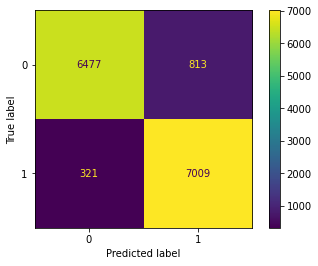

In [67]:
plot_confusion_matrix(dtclf, X_test_s, y_test_s)
plt.show()

In [82]:
nbclf = GaussianNB()
nbclf = nbclf.fit(X_train_s, y_train_s)

In [83]:
y_pred_s = nbclf.predict(X_test_s)
print(accuracy_score(y_test_s,y_pred_s))
print(classification_report(y_test_s, y_pred_s))

0.8683310533515732
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7290
           1       0.87      0.87      0.87      7330

    accuracy                           0.87     14620
   macro avg       0.87      0.87      0.87     14620
weighted avg       0.87      0.87      0.87     14620



C:\Users\Abhishek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


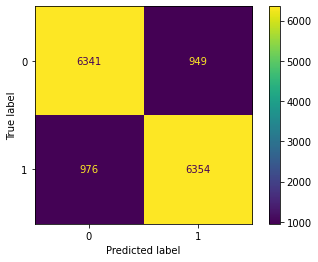

In [84]:
plot_confusion_matrix(nbclf, X_test_s, y_test_s)
plt.show()

In [85]:
rfclf = RandomForestClassifier(max_depth = 10, max_features= 25, n_estimators= 100,class_weight= {0:1,1:1})
rfclf = rfclf.fit(X_train_s,y_train_s)

In [86]:
y_pred_s = rfclf.predict(X_test_s)
print(accuracy_score(y_test_s,y_pred_s))
print(classification_report(y_test_s, y_pred_s))

0.9389192886456909
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      7290
           1       0.92      0.96      0.94      7330

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620



C:\Users\Abhishek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


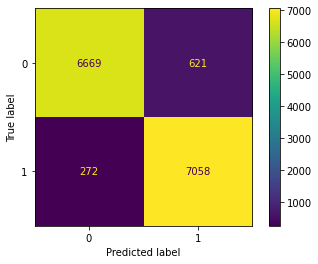

In [87]:
plot_confusion_matrix(rfclf, X_test_s, y_test_s)
plt.show()

## BorderlineSMOTE

In [68]:
oversample_bs = BorderlineSMOTE()
X_bs, y_bs = oversample_bs.fit_resample(df, y)

In [69]:
cnt_3 = Counter(y_bs)
print(cnt_3)

Counter({0: 36548, 1: 36548})


In [70]:
X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(X_bs, y_bs, test_size = 0.2, random_state = 100)

In [71]:
dtclf = DecisionTreeClassifier( max_depth=8, criterion='gini',class_weight= {0:1,1:1})
dtclf= dtclf.fit(X_train_bs,y_train_bs)

In [72]:
y_pred_bs = dtclf.predict(X_test_bs)
print(accuracy_score(y_test_bs,y_pred_bs))
print(classification_report(y_test_bs, y_pred_bs))

0.918467852257182
              precision    recall  f1-score   support

           0       0.96      0.88      0.91      7290
           1       0.89      0.96      0.92      7330

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620



C:\Users\Abhishek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


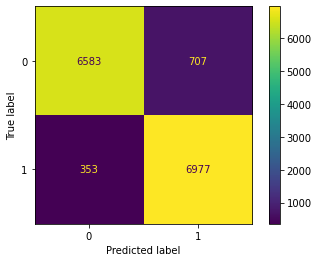

In [110]:
plot_confusion_matrix(dtclf, X_test_bs, y_test_bs)
plt.show()

In [104]:
rfclf = RandomForestClassifier(max_depth = 10, max_features= 25, n_estimators= 100,class_weight= {0:1,1:1})
rfclf = rfclf.fit(X_train_bs, y_train_bs)

In [105]:
y_pred_bs = rfclf.predict(X_test_bs)
print(accuracy_score(y_test_bs,y_pred_bs))
print(classification_report(y_test_bs, y_pred_bs))

0.9415184678522572
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7290
           1       0.92      0.97      0.94      7330

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620



C:\Users\Abhishek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


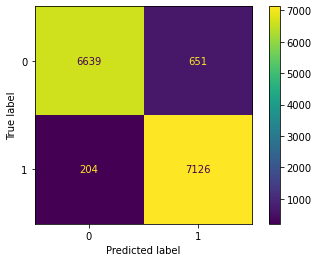

In [109]:
plot_confusion_matrix(rfclf, X_test_bs, y_test_bs)
plt.show()

In [106]:
nbclf = GaussianNB()
nbclf = nbclf.fit(X_train_bs, y_train_bs)

In [107]:
y_pred_bs = nbclf.predict(X_test_bs)
print(accuracy_score(y_test_bs,y_pred_bs))
print(classification_report(y_test_bs, y_pred_bs))

0.8646374829001368
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7290
           1       0.86      0.88      0.87      7330

    accuracy                           0.86     14620
   macro avg       0.86      0.86      0.86     14620
weighted avg       0.86      0.86      0.86     14620



C:\Users\Abhishek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


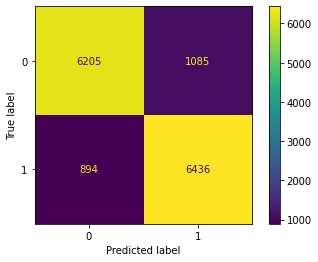

In [108]:
plot_confusion_matrix(nbclf, X_test_bs, y_test_bs)
plt.show()

## SVMSMOTE

In [73]:
oversample_ss = SVMSMOTE()
X_ss, y_ss = oversample_ss.fit_resample(df, y)

In [74]:
cnt_4 = Counter(y_ss)
print(cnt_4)

Counter({0: 36548, 1: 36548})


In [75]:
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(X_ss, y_ss, test_size = 0.2, random_state = 100)

In [45]:
dtclf = DecisionTreeClassifier( max_depth=8, criterion='gini',class_weight= {0:1,1:1})
dtclf= dtclf.fit(X_train_ss, y_train_ss)

In [76]:
y_pred_ss = dtclf.predict(X_test_ss)
print(accuracy_score(y_test_ss, y_pred_ss))
print(classification_report(y_test_ss, y_pred_ss))

0.9018467852257182
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      7290
           1       0.88      0.93      0.90      7330

    accuracy                           0.90     14620
   macro avg       0.90      0.90      0.90     14620
weighted avg       0.90      0.90      0.90     14620



C:\Users\Abhishek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


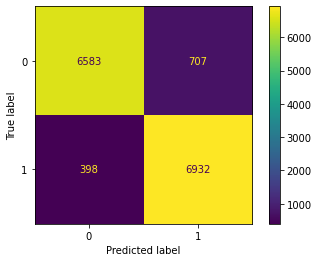

In [93]:
plot_confusion_matrix(dtclf, X_test_ss, y_test_ss)
plt.show()

In [88]:
rfclf = RandomForestClassifier(max_depth = 10, max_features= 25, n_estimators= 100,class_weight= {0:1,1:1})
rfclf = rfclf.fit(X_train_ss, y_train_ss)

In [90]:
y_pred_ss = rfclf.predict(X_test_ss)
print(accuracy_score(y_test_ss, y_pred_ss))
print(classification_report(y_test_ss, y_pred_ss))

0.9399452804377565
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7290
           1       0.92      0.97      0.94      7330

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620



C:\Users\Abhishek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


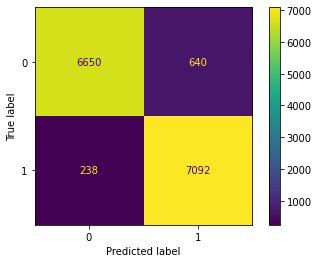

In [92]:
plot_confusion_matrix(rfclf, X_test_ss, y_test_ss)
plt.show()

In [94]:
nbclf = GaussianNB()
nbclf = nbclf.fit(X_train_ss, y_train_ss)

In [95]:
y_pred_ss = nbclf.predict(X_test_ss)
print(accuracy_score(y_test_ss, y_pred_ss))
print(classification_report(y_test_ss, y_pred_ss))

0.8253077975376197
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      7290
           1       0.87      0.76      0.81      7330

    accuracy                           0.83     14620
   macro avg       0.83      0.83      0.82     14620
weighted avg       0.83      0.83      0.82     14620



C:\Users\Abhishek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


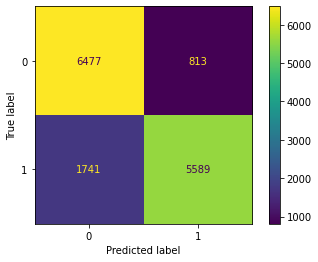

In [96]:
plot_confusion_matrix(nbclf, X_test_ss, y_test_ss)
plt.show()

## ADASYN

In [77]:
oversample_as = ADASYN()
X_as, y_as = oversample_as.fit_resample(df, y)

In [78]:
cnt_5 = Counter(y_as)
print(cnt_5)

Counter({1: 36900, 0: 36548})


In [79]:
X_train_as, X_test_as, y_train_as, y_test_as = train_test_split(X_as, y_as, test_size = 0.2, random_state = 100)

In [80]:
dtclf = DecisionTreeClassifier( max_depth=8, criterion='gini',class_weight= {0:1,1:1})
dtclf= dtclf.fit(X_train_as, y_train_as)

In [81]:
y_pred_as = dtclf.predict(X_test_as)
print(accuracy_score(y_test_as, y_pred_as))
print(classification_report(y_test_as, y_pred_as))

0.9221238938053097
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7271
           1       0.90      0.95      0.92      7419

    accuracy                           0.92     14690
   macro avg       0.92      0.92      0.92     14690
weighted avg       0.92      0.92      0.92     14690



C:\Users\Abhishek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


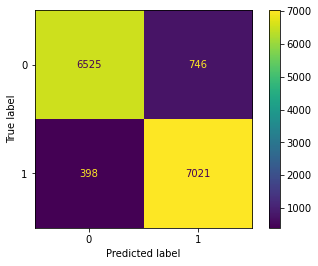

In [103]:
plot_confusion_matrix(dtclf, X_test_as, y_test_as)
plt.show()

In [97]:
rfclf = RandomForestClassifier(max_depth = 10, max_features= 25, n_estimators= 100,class_weight= {0:1,1:1})
rfclf = rfclf.fit(X_train_as, y_train_as)

In [98]:
y_pred_as = rfclf.predict(X_test_as)
print(accuracy_score(y_test_as, y_pred_as))
print(classification_report(y_test_as, y_pred_as))

0.9394826412525528
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7271
           1       0.92      0.97      0.94      7419

    accuracy                           0.94     14690
   macro avg       0.94      0.94      0.94     14690
weighted avg       0.94      0.94      0.94     14690



C:\Users\Abhishek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


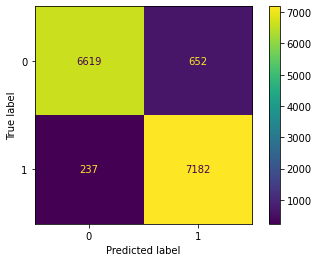

In [102]:
plot_confusion_matrix(rfclf, X_test_as, y_test_as)
plt.show()

In [99]:
nbclf = GaussianNB()
nbclf = nbclf.fit(X_train_as, y_train_as)

In [100]:
y_pred_as = nbclf.predict(X_test_as)
print(accuracy_score(y_test_as, y_pred_as))
print(classification_report(y_test_as, y_pred_as))

0.8730428863172226
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7271
           1       0.87      0.88      0.87      7419

    accuracy                           0.87     14690
   macro avg       0.87      0.87      0.87     14690
weighted avg       0.87      0.87      0.87     14690



C:\Users\Abhishek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


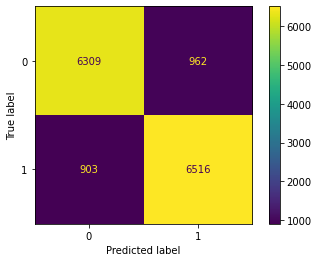

In [101]:
plot_confusion_matrix(nbclf, X_test_as, y_test_as)
plt.show()